In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


In [2]:
salary_df = pd.read_csv("Resources/salaries.csv")
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [3]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [5]:
# nunique tells me how many unique values are in each column
salary_df.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              155
salary                2560
salary_currency         23
salary_in_usd         2939
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64

In [11]:
# create different smaller dataframes to plot
salary_df['experience_level'].value_counts()

SE    10670
MI     4038
EN     1325
EX      501
Name: experience_level, dtype: int64

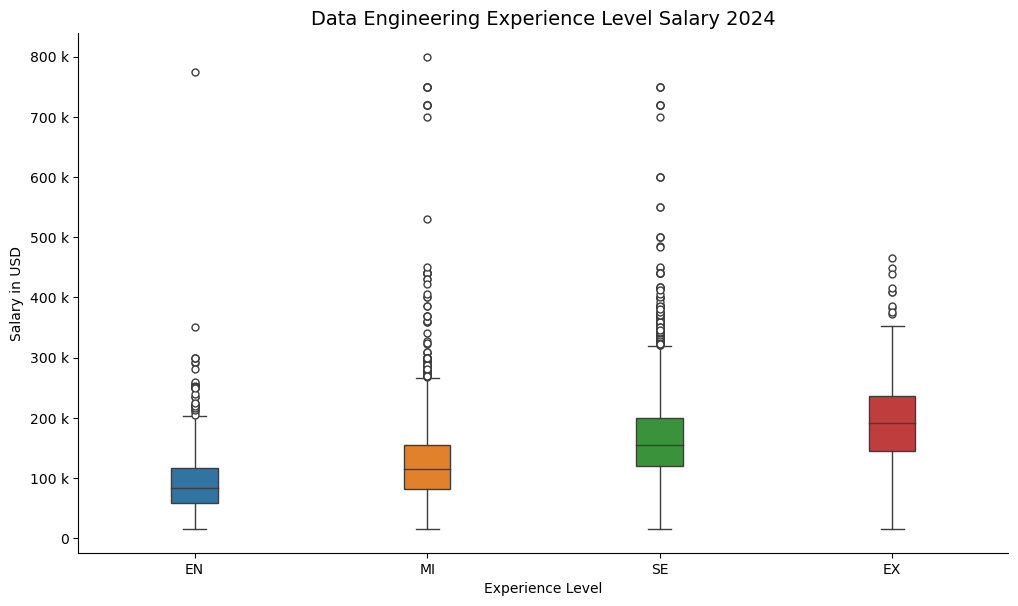

In [116]:
#plot salary based on experience level

plt.figure(figsize = (12, 6.75))


ax = sns.boxplot(data = salary_df, x = 'experience_level', y = 'salary_in_usd', order = ['EN', 'MI', 'SE', 'EX'],
                 linewidth = 1,
                 width = .2,
                 flierprops = dict(marker='o', markersize = 5, markerfacecolor= 'white'))

# Set it so it's easier to read using major formatter
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# change title
plt.title("Data Engineering Experience Level Salary 2024", fontsize = 14)

# axis labels
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')

sns.despine()

plt.show()

In [107]:
# Analysis
# The KeyError you're encountering (KeyError: 0.25) indicates that the specified quantile (0.25) is not 
# present in the index of the quartiles DataFrame. This can happen if the calculated quantiles don't exactly 
# match the specified quantiles due to rounding or other factors.

# Calculate quartiles and IQR for each experience level
# salary_df.groupby('experience_level')['salary_in_usd'].quantile([0.25, 0.5, 0.75]) calculates quartiles for each experience level.
quartiles = salary_df.groupby('experience_level')['salary_in_usd'].quantile([0.25, 0.5, 0.75])

# quantile basically gives back values in the series that are at the argumented values

#quartiles.groupby returns a dictionary pairing of the exp_level and the quartiles that are defined
for exp_level, quartile_values in quartiles.groupby(level=0): 
    lowerq = quartile_values.loc[(exp_level,0.25)]
    upperq = quartile_values.loc[(exp_level, 0.75)]
    iqr = upperq-lowerq

    print(f"\nExperience Level: {exp_level}")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"Interquartile Range: {iqr}")






Experience Level: EN
Lower Quartile: 58000.0
Upper Quartile: 116000.0
Interquartile Range: 58000.0

Experience Level: EX
Lower Quartile: 145000.0
Upper Quartile: 236000.0
Interquartile Range: 91000.0

Experience Level: MI
Lower Quartile: 80982.0
Upper Quartile: 155000.0
Interquartile Range: 74018.0

Experience Level: SE
Lower Quartile: 120000.0
Upper Quartile: 200000.0
Interquartile Range: 80000.0


In [111]:
quartiles.groupby(level=0).groups

{'EN': [('EN', 0.25), ('EN', 0.5), ('EN', 0.75)], 'EX': [('EX', 0.25), ('EX', 0.5), ('EX', 0.75)], 'MI': [('MI', 0.25), ('MI', 0.5), ('MI', 0.75)], 'SE': [('SE', 0.25), ('SE', 0.5), ('SE', 0.75)]}

In [106]:
salary_df.groupby('experience_level')['salary_in_usd'].groups

{'EN': [8, 9, 24, 25, 30, 31, 74, 75, 114, 115, 145, 162, 163, 190, 191, 216, 217, 228, 229, 240, 241, 313, 314, 319, 320, 331, 332, 337, 338, 387, 388, 447, 448, 453, 454, 465, 466, 493, 494, 495, 496, 513, 514, 570, 575, 576, 577, 578, 579, 580, 587, 588, 589, 590, 657, 658, 667, 668, 673, 674, 675, 676, 679, 680, 683, 684, 695, 696, 721, 722, 723, 724, 743, 744, 747, 748, 768, 769, 772, 773, 776, 777, 788, 789, 821, 822, 853, 854, 855, 856, 881, 882, 888, 889, 908, 909, 956, 957, 1036, 1045, ...], 'EX': [12, 13, 133, 134, 164, 165, 166, 167, 182, 183, 236, 237, 296, 297, 347, 348, 379, 380, 457, 458, 487, 488, 543, 544, 613, 614, 653, 654, 831, 832, 833, 834, 847, 848, 944, 945, 1012, 1013, 1128, 1129, 1207, 1208, 1217, 1218, 1255, 1256, 1410, 1411, 1432, 1433, 1458, 1459, 1580, 1581, 1596, 1597, 1604, 1605, 1629, 1630, 1796, 1797, 1798, 1799, 1800, 1801, 1922, 1923, 1966, 1967, 2011, 2012, 2055, 2056, 2075, 2076, 2111, 2112, 2129, 2130, 2161, 2162, 2240, 2241, 2298, 2299, 2344, 234